**МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ**

**ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ**

**МУРМАНСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ**

**Институт арктических технологий**

**Кафедра Цифровых технологий, математики и экономики**

**Дисциплина:** Обработка экспериментальных данных

**Расчетно-графическая работа**

**Тема**: Реализация функций генерации случайных величин

**Выполнил**: студент группы ИВТб18о-1, Корнилов Владислав Валерьевич

**Проверил**: доцент кафедры ЦТМиЭ, к. ф.-м. н., Золотов Олег Владимирович

**Дата защиты**: 25.03.2022

**Задание**:
Выборки: 10, 100, 1000, 10000, 100000

Законы распределения случайных величин:
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла

Для выборок: посчитать оценки (мат ожидание, СКО, медиана)

In [2]:
import scipy.stats as sps
import scipy.ndimage as snd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

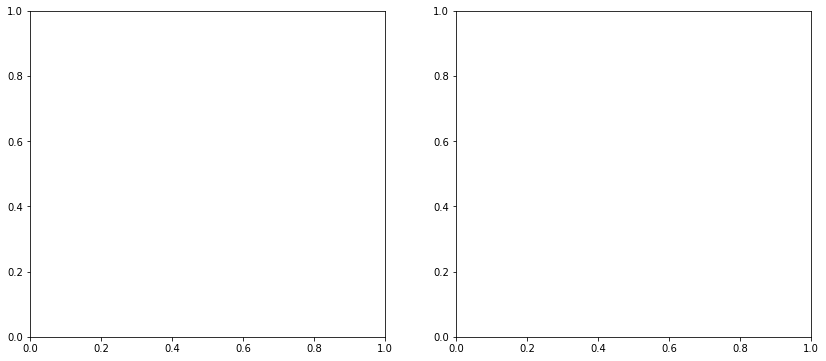

In [30]:
fig = plt.figure(figsize=(14,6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

yMax = 1
xMax = 1

#line1, = ax1.plot([], [], 'r', lw=2)     # ax.plot returns a list of 2D line objects
#line2, = ax2.plot([], [], 'g', lw=2)
means = []
#line3, = ax3.plot([], [], 'b', lw=2)

# список размеров выборки
data_size = [10, 100, 1000, 10000, 100000]

In [4]:
# n - кол-во испытаний
# p - вероятность успеха
DefaultModels = {
    "binomial" : sps.binom(n = 10, p = 0.5),
    "bernoulli": sps.bernoulli(p = 0.5),
    "geom": sps.geom(p = 0.5),
    "poisson" : sps.poisson(mu = 10),
    "exponential" : sps.expon(),
    "uniform" : sps.uniform(),
    "normal" : sps.norm(),
    "hi-squared" : sps.chi2(df = 55),
    "student" : sps.t(df = 2.74),
    "fisher" : sps.f(3, 3),
    "weibull" : sps.weibull_min(c = 1.79)
}
ListOfModels = list(DefaultModels.keys())

discrete = [0, 1, 2, 3]

In [58]:
# animation function. This is called sequentially
def drawframe(n, *args):
    #print('#####################')
    #print("FRAME = ", n)

    (means, lawName) = args
    #rvs, ideal = BinomLaw(10, 0.5, data_size[n])
    givenLaw = DefaultModels[lawName]
    lawIndex = ListOfModels.index(lawName)
    rvs = givenLaw.rvs(data_size[n])
    means.append(rvs.mean())

    xMin = givenLaw.ppf(0.01)
    xMax = givenLaw.ppf(0.99) + 1
    xTicks = []
    probFun = []



    #xTicks = np.linspace(xMin, xMax, 100)

    ax1.clear()
    #ax1.set_xticks(xTicks)

    if lawIndex in discrete:
        y, x, _ = ax1.hist(rvs, bins = int(xMax - xMin), range=(xMin, xMax), rwidth=0.8, density=True)
    else:
        y, x, _ = ax1.hist(rvs, bins = 10, range=(xMin, xMax), rwidth=0.8, density=True)
    yMax = max(y) * 1.1
    ax1.set(xlim = (xMin, xMax), ylim = (0, yMax))
    ax1.set_title("Выборка: " + str(data_size[n]) +
                  "\nМат. ожидание: " + str(rvs.mean()) +
                  "\nСКО: " + str(rvs.std()) +
                  "\nМедиана: " + str(np.median(rvs)), fontsize = 10)

    if lawIndex not in discrete:
        xTicks = np.linspace(xMin, xMax, 100)
        probFun = givenLaw.pdf(xTicks)
        ax1.plot(xTicks, probFun, 'r-', lw = 2)

    ax2.clear()
    ax2.set(xlim = (0, len(data_size)),
            ylim = (min(means) - 0.25, max(means) + 0.25),
            xticklabels=list(map(str, data_size))
            )
    ax2.hlines(y=givenLaw.mean(), xmin=0, xmax=len(data_size), lw=1, colors='red')
    ax2.plot(means[1:])

In [6]:
from matplotlib import animation, rc


def AnimateParam(lawName):
    means = []
    args = (means, lawName)
    anim = animation.FuncAnimation(fig, drawframe, fargs=args, frames = len(data_size), interval = 1000, blit=False)
    rc('animation', html='jshtml')
    #plt.show()
    return anim

## 1) Биномиальное распределение

Биномиальное распределение используется, когда необходимо определить сколько раз происходит некоторое событие в серии из определенного числа независимых опытов, выполняемых в одинаковых условиях.

$f(x;n,p)=C_n^k p^x q^{(n-x)}$;

$F(x;n,p)=\sum_{i=0}^x C_n^i p^i q^{(n-i)}$

$n \geq 0$ - число независимых испытаний

$0 \leq p \leq 1$ - вероятность появления некоторого события в каждом испытании

$q = 1 - p$ - вероятность не появления некоторого события в каждом испытании

$M(X) = np$;

$D(X) = npq$;

$\sigma(X) = \sqrt{npq}$.

In [56]:
AnimateParam("binomial")

## 2) Распределение Бернулли

Распределение Бернулли является частным случаем биномиального распределения, где проводится одно испытание (поэтому n будет равно 1 для такого биномиального распределения).

Распределение применяется для моделирования случайного эксперимента произвольной природы, когда заранее известна вероятность успеха или неудачи.

$f(x) = \left\{
\begin{matrix}
1 - p, & x = 0 \\
p, & x = 1
\end{matrix}
\right..$

Принято говорить, что событие $ \{X=1\}$ соответствует «успеху», а событие $ \{X=0\}$ — «неудаче». Эти названия условные, и в зависимости от конкретной задачи могут быть заменены на противоположные.

$0 \leq p \leq 1$ - вероятность появления события в испытании

$ M(X) = p $;

$D(X) = p \cdot (1 - p) = p \cdot q $;

$\sigma(X) = \sqrt{p \cdot q}$.

In [59]:
AnimateParam("bernoulli")

## 3) Геометрическое распределение

Величину X геометрического распределения можно интерпретировать как число испытаний (n) до первого появления успеха в схеме независимых испытаний с вероятностью появления успеха р.

$F(x)=q^{n}p$

$f(x)=1-q^n$

$n \geq 0$ - число "неудач" до первого "успеха"

$0 \leq p \leq 1$ - вероятность появления события в испытании

$q = 1 - p$ - вероятность не появления события в каждом испытании

$ M(X) = \frac {q}{p} $;

$D(X) = \frac {q}{p^2}$;

$\sigma(X) = \frac {\sqrt{q}}{p}$.

In [60]:
AnimateParam("geom")

## 4) Распределение Пуассона
— распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

Примеры ситуаций, которые можно смоделировать, применив это распределение: поломки оборудования, длительность исполнения ремонтных работ стабильно работающим сотрудником, ошибка печати, рост колонии бактерий в чашке Петри, дефекты в длинной ленте или цепи, импульсы счётчика радиоактивного излучения, количество забиваемых футбольной командой голов и др.

$f(x) = {\frac {exp(-\mu) \cdot \mu ^{x}}{x!}}, x \ge 0$



$ \mu $ - среднее количество событий за фиксированный промежуток времени

$ M(X) = \mu $;

$D(X) = \mu $;

$\sigma(X) = \sqrt{ \mu }$.

In [61]:
AnimateParam("poisson")

## 5) Экспоненциальное распределение

Экспоненциальное распределение предсказывает периоды времени между событиями (такими как успех, отказ, доставка и т.д.). Это непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.
Параметры: $\lambda > 0$,  - среднее число событий за фиксированный промежуток времени = интенсивность (мат. ожидание).

Экспоненциальное распределение применяется при моделировании времени ожидания, моделировании отказа, моделировании времени обслуживания.
Если число событий в единицу времени соответствует распределению Пуассона, тогда период времени между событиями соответствует экспоненциальному распределению.

$f_{X}(x)={\begin{cases}\lambda \,e^{{-\lambda x}},&x\geq 0,\\0,&x<0.\end{cases}}$;

$F_{X}(x)=\left\{{\begin{matrix}1-e^{{-\lambda x}}&,\;x\geq 0,\\0&,\;x<0.\end{matrix}}\right.$;

$M(X) = {\lambda ^{-1}}$;

$D(X) = {\lambda ^{-2}}$;

$\sigma(X) = \sqrt{\lambda ^{-2}}$.

In [62]:
AnimateParam("exponential")

## 6) Равномерное распределение
— распределение случайной вещественной величины, принимающей значения, принадлежащие некоторому промежутку конечной длины, характеризующееся тем, что плотность вероятности на этом промежутке почти всюду постоянна.

В современной вычислительной технике при моделировании случайных процессов часто приходится пользоваться с.в. X, имеющей равномерное распределение в пределах от 0 до 1.

$f(x) = \left\{
\begin{matrix}
\frac{1}{b-a}, & x \in [a, b] \\
0, & x \not \in [a, b]
\end{matrix}
\right..$

Если ${a=0}$ и ${b=1}$, то такое равномерное распределение называют стандартным.

$ M(X) = \frac{a+b}{2} $;

$D(X) = \frac{(b-a)^2}{12} $;

$\sigma(X) = \frac{b-a}{\sqrt{12}}$.

In [63]:
AnimateParam("uniform")

## 7) Нормальное распределение

Нормальное распределение часто встречается в природе. Например, следующие случайные величины хорошо моделируются нормальным распределением:

1. отклонение при стрельбе;
2. погрешности измерений (однако погрешности некоторых измерительных приборов имеют иное распределение);
3. некоторые характеристики живых организмов в популяции.

Стандартным нормальным распределением называется нормальное распределение с математическим ожиданием ${\mu =0}$ и стандартным отклонением ${ \sigma =1.}$

${ f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

где параметр ${\mu }$  — математическое ожидание (среднее значение), медиана и мода распределения, а параметр ${\sigma }$ — среднеквадратическое отклонение, ${ \sigma ^{2}}$ — дисперсия распределения.

Функция распределения:
${ \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int \limits _{-\infty }^{x}e^{-t^{2}/2}\,dt.}$;

$M(X) = \mu$;

$D(X) =  {\sigma ^{2}} $;

$\sigma(X) = \sigma $.

In [64]:
AnimateParam("normal")

## 8) Распределение $ \chi^2 $
— распределение суммы квадратов ${k}$ независимых стандартных нормальных случайных величин.

Распределение имеет многочисленные приложения при статистических выводах, например:
1) при использовании критерия хи-квадрат и при оценке дисперсий;
2) в проблеме оценивания среднего нормально распределённой популяции и проблеме оценивания наклона линии регрессии;
3) в дисперсионном анализе.

$f(x, k) = {\frac {(1/2)^{k/2}}{\Gamma (k/2)}}x^{k/2-1}e^{-x/2}$

где ${\displaystyle \Gamma (z)=\int \limits _{0}^{+\infty }t^{z-1}e^{-t}\,dt,\quad z\in \mathbb {C} ,\quad \mathrm {Re} (z)>0}$ - гамма-функция

$ M(X) = k $;

$D(X) = 2 \cdot k $;

$\sigma(X) = \sqrt{2 \cdot k}$.

In [65]:
AnimateParam("hi-squared")

## 9) Распределение Стьюдента

Распределение Стьюдента играет важную роль в статистическом анализе и используется, например, в t-критерии Стьюдента для оценки статистической значимости разности двух выборочных средних, при построении доверительного интервала для математического ожидания нормальной совокупности при неизвестной дисперсии, а также в линейном регрессионном анализе

${\ f_{t}(y)={\frac {\Gamma \left({\frac {n+1}{2}}\right)}{{\sqrt {n\pi }}\,\Gamma \left({\frac {n}{2}}\right)}}\,\left(1+{\frac {y^{2}}{n}}\right)^{-{\frac {n+1}{2}}}}$

где ${\displaystyle \Gamma (z)=\int \limits _{0}^{+\infty }t^{z-1}e^{-t}\,dt,\quad z\in \mathbb {C} ,\quad \mathrm {Re} (z)>0}$ - гамма-функция

$M(X) = 0, n > 1$

$D(X) = 0$

$\sigma(X) = {\frac  {n}{n-2}}, n > 2$


In [66]:
AnimateParam("student")

## 10) Распределение Фишера

На распределении Фишера основан ряд статистических тестов, таких как оценка значимости параметров регрессии, тест на гетероскедастичность и тест на равенство дисперсий нормальных выборок

Распределение Фишера определено для действительных неотрицательных аргументов

Пусть $Y_{1},Y_{2}$ — две независимые случайные величины, имеющие распределение хи-квадрат: ${\displaystyle Y_{i}\sim \chi ^{2}(d_{i})}$, где $\in {\mathbb  {N}},\;i=1,2$. Тогда распределение случайной величины

$F={\frac  {Y_{1}/d_{1}}{Y_{2}/d_{2}}}$ называется распределением Фишера со степенями свободы $d_{1} и d_{2}.$

$f(x)={\frac {\sqrt {\frac {(d_{1}\,x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}\,x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}$ ,
где ${\ \mathrm {B} (x,y)=\int \limits _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt,}$

$d_{1}>0,\ d_{2}>0$ - числа степеней свободы

$F(x)={I_{\frac {d_{1}x}{d_{1}x+d_{2}}}(d_{1}/2,d_{2}/2)$

$M(x)={{\frac {d_{2}}{d_{2}-2}}$, если $d_2>2$

$D(x)={{\frac {2\,d_{2}^{2}\,(d_{1}+d_{2}-2)}{d_{1}(d_{2}-2)^{2}(d_{2}-4)}},$ если $d_2>4$




In [67]:
AnimateParam("fisher")

## 11) Распределение Вейбулла

Примеры использования распределения Вейбулла:
1. В анализе выживаемости
2. В надёжности и анализе отказов
3. В электротехнике для представления перенапряжения, возникающего в электрических цепях
4. В промышленной инженерии
5. В теории экстремальных значений
6. В прогнозировании погоды (Для описания распределения скорости ветра как распределения, обычно совпадающего с распределением Вейбулла в ветроэнергетике)

$$f_X(x) = \left\{
\begin{matrix}
\frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-\left(\frac{x}{\lambda}\right)^k}, & x \ge 0 \\
0, & x < 0
\end{matrix}
\right..$$

$F(x;k,\lambda)=1- e^{-(x/\lambda)^k}$

$\lambda > 0$ - коэффициент масштаба

$k > 0$ - коэффициент формы

$M(X) = {\lambda \Gamma \left(1+{\frac {1}{k}}\right)}$

$D(X) = {\lambda ^{2}\Gamma \left(1+{\frac {2}{k}}\right)-\mu ^{2}}$

$\sigma(X) = \sqrt{D(X)}$


In [70]:
AnimateParam("weibull")

## Корреляция и ковариация
Исходное распределение:    нормальное
Шум распределен по закону: экспоненциальное
Коээфициент шума:          0.2

Матрица ковариации
 [[ 0.9969008   0.98967858]
 [ 0.98967858 53.19344973]]
Матрица корреляции по Пирсону
 [[1.         0.13590615]
 [0.13590615 1.        ]]
Корреляция по Спирмену
 SpearmanrResult(correlation=0.7577264543870448, pvalue=0.0)


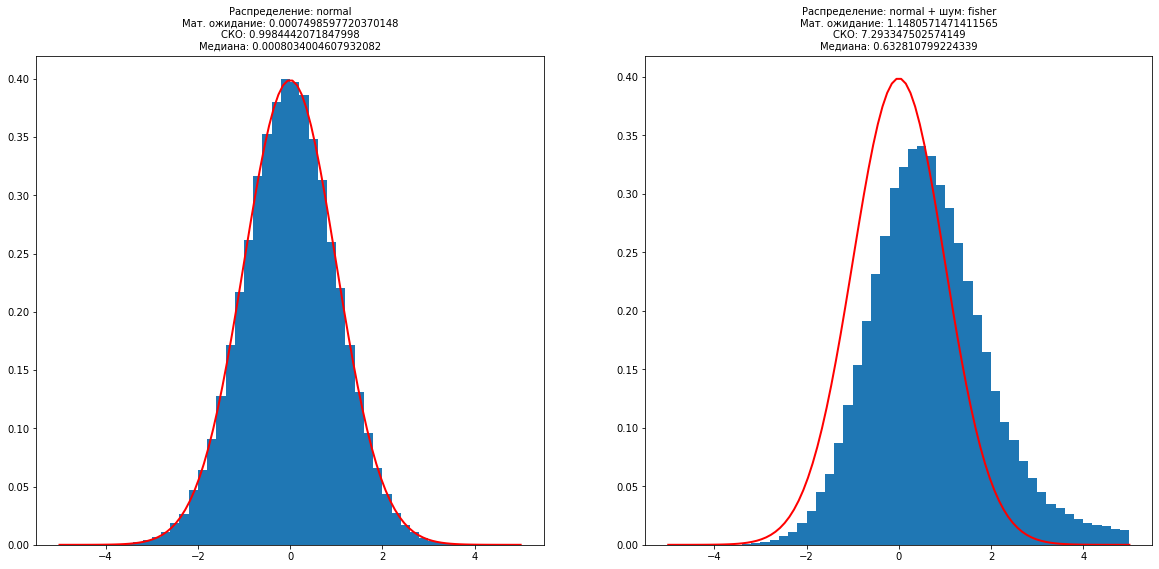

In [87]:
distr = "normal"
noise = "fisher"
multiplier = 0.4

givenLaw = DefaultModels[distr].rvs(size=100000)
noiseLaw = DefaultModels[noise].rvs(size=100000)
lawWithNoise = givenLaw + noiseLaw * multiplier

covariate = np.cov(givenLaw, lawWithNoise)
corrPierson = np.corrcoef(givenLaw, lawWithNoise)
corrSpierman = sps.spearmanr(givenLaw, lawWithNoise)

print("Матрица ковариации\n", covariate)
print("Матрица корреляции по Пирсону\n", corrPierson)
print("Корреляция по Спирмену\n", corrSpierman)

fig = plt.figure(figsize=(20, 9))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

bins = 50
xLim = (-5, 5)
xTicks = np.linspace(xLim[0], xLim[1], 100)
probFun = DefaultModels[distr].pdf(xTicks)

ax1.hist(givenLaw, bins=bins, density=True, range=xLim)
ax2.hist(lawWithNoise, bins=bins, density=True, range=xLim)

ax1.set_title("Распределение: " + distr +
              "\nМат. ожидание: " + str(givenLaw.mean()) +
              "\nСКО: " + str(givenLaw.std()) +
              "\nМедиана: " + str(np.median(givenLaw)), fontsize = 10)
ax1.plot(xTicks, probFun, 'r-', lw = 2)

ax2.set_title("Распределение: " + distr + " + шум: " + noise +
              "\nМат. ожидание: " + str(lawWithNoise.mean()) +
              "\nСКО: " + str(lawWithNoise.std()) +
              "\nМедиана: " + str(np.median(lawWithNoise)), fontsize = 10)
ax2.plot(xTicks, probFun, 'r-', lw = 2)
plt.show()